¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import math as mt
from math import factorial
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

## Cargar datos

In [ ]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]


In [ ]:
def ContadorDuplicates(contador , df):
    if contador > 1:
        print(f"El data frame '{df}' tiene {contador} duplicados")
    else:
        print(f"El data frame '{df}' no tiene duplicados")

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Desarrollaste de manera excelente el análisis de duplicados de casos. 
    
</div>

## Tarifas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
# Imprime una muestra de los datos para las tarifas
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Como podemos ver ejecutando la funcion info() obteniendo los tipos de datos, los valores nulos, y los nombres de las columnas no encuentro que los tipos de datos esten mal asignados, los nombres de las columnas estan correctamente escritos ya que no hay espacios de mas y cumplen con la estructura de snake_case y bueno en este data frame el cual consta de solo 2 filas las cuales son de el plan surf y el plan ultimate no contamos con valores nulos

## Corregir datos

A simple vista en el DataFrame plans no encuentro posibles problemas para corregir ya que como explique anterior mente todo esta bien estructurado

## Enriquecer los datos

Este DataFrame lo encuentro perfectamente estructurado por lo que no tendria nada que agregarle y como podemos que ver no cuenta con filas duplicadas. al realizar los siguientes ejercicios el cual pide unir una tabla con la tabla plans al la columna tener por nombre plan_name me complica la union por lo que procedo a cambiarla plan

In [ ]:
plans = plans.rename(columns={'plan_name': 'plan'})

plans_duplicates = plans.duplicated().sum()

ContadorDuplicates(plans_duplicates , "plans")

El data frame 'plans' no tiene duplicados



<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> Mas adelante creo la columna gb_used a la tabla internet ya que sera necesaria para hacer los calculos respectivos para el costo final de el plan<a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Usuarios/as

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
# Imprime una muestra de datos para usuarios
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


A simple vista veo que los nombres de las columnas estan bien estructurados con el uso de snake_case, los tipos de datos estan bien asignados a excepcion de 2 los cuales explico a continuacion y por ultimo podemos ver que no hay valores nulos a excepcion de la columna churn_date pero esto no llega a ser un problema ya que en la descripcion de las tablas nos dice que la columna churn_date almacena la fecha en la que el usuario dejó de usar el servicio pero si el valor es ausente significa que la tarifa se estaba usando cuando fue extraída esta base de datos.

### Corregir los datos

El unico problema que llegue a encontrar es que la columna red_date y churn_date como podemos ver almacenaremos fehcas por lo que lo unico que hice fue cambiar el tipo de dato object el cual es como un string a un tipo de dato datetime y como vemos a continuacion el cambio ya esta realizado.

In [ ]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

Este DataFrame lo encuentro perfectamente estructurado por lo que no tendria nada que agregarle y como podemos ver que no cuenta con filas duplicadas

In [ ]:
users_duplicates = users.duplicated().sum()

ContadorDuplicates(users_duplicates , "users")


El data frame 'users' no tiene duplicados


## Llamadas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
# Imprime una muestra de datos para las llamadas
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Podemos observar que el data frame esta bien estruvturado, utiliza snake_case para el nombre de las columnas los tipos de datos estab bien establecidos a excepcion de uno que cambiaria y lo explicare en el siguiente punto, podemos ver que no hay filas duplicadas, la columna user_id imprimiendo la muestra podemos ver el id de usuario repetido varias veces lo que no esta mal ya que significa las diferentes veces en las que un usuario realizo una llamada.

### Corregir los datos

En la informacion de el data frame calls podemos observar que la columna call_date la cual almacena las fechas en las que un usuario realizo una llamada vemos que el tipo de dato asignado es object el cual almacena texto pero para una futura manipulacion de esa columna la cambie a tipo datetime. 

In [ ]:
calls['call_date']  = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

Este DataFrame lo encuentro perfectamente estructurado por lo que no tendria nada que agregarle y como podemos ver que no cuenta con filas duplicadas.

In [ ]:
calls_duplicates = calls.duplicated().sum()

ContadorDuplicates(calls_duplicates , "calls")

El data frame 'calls' no tiene duplicados


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> Las llamadas con duracion 0 ya que la duracion esta almacenada en minutos podria significar una llamada la cual duro segundos pero al no tener 60 segundos esta figura como 0 minutos  <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Mensajes

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# Imprime una muestra de datos para los mensajes
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Podemos observar que en el data frame messages la estructura esta bien a simple vista el unico problema encontrado podria ser el tipo de dato de la columna message_date lo cual explico en el siguiente punto pero por lo demas no tenemos valores nulos, los nombres de las categorias cuentan con un buen formato, etc.

### Corregir los datos

Al igual con los otros data frames opte por cambiar el tipo de dato de la columna message_date a un tipo de dato datetime por si en un futuro hay alguna manipulacion de esa columna.

In [ ]:
messages['message_date'] = pd.to_datetime(messages['message_date'] , format = '%Y-%m-%d' )
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

Este DataFrame lo encuentro perfectamente estructurado por lo que no tendria nada que agregarle y como podemos ver que no cuenta con filas duplicadas.

In [ ]:
messages_duplicates = messages.duplicated().sum()
ContadorDuplicates(messages_duplicates, "messages")

El data frame 'messages' no tiene duplicados


## Internet

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
# Imprime una muestra de datos para el tráfico de internet
internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


Podemos observar que en el data frame internet la estructura esta bien a simple vista el unico problema encontrado podria ser el tipo de dato de la columna session_date lo cual explico en el siguiente punto pero por lo demas no tenemos valores nulos, los nombres de las categorias cuentan con un buen formato, etc.

### Corregir los datos

Al igual con los otros data frames opte por cambiar el tipo de dato de la columna session_date a un tipo de dato datetime por si en un futuro hay alguna manipulacion de esa columna.

In [ ]:
internet['session_date'] = pd.to_datetime(internet['session_date'] , format = '%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

Posteriormente cuando tengamos que hacer los calculos para la tarifa tendremos que convertir la columna mb_used en gb para asi poder hacer el calculo y utilizaremos esta formula

In [ ]:
#internet ['gb_used'] = np.ceil(internet['mb_used']/1024)

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> Ahi ya se puede apreciar la transformacion de la columna mb_used a gb_used utilizando redondeo superior<a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [ ]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [ ]:
#Crear la columna month para extraer el mes para los calculos requeridos
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month


In [ ]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls_per_month = calls.groupby(['user_id', 'month']).size().reset_index(name='call_count')

calls_per_month.head()

,user_id,month,call_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

In [ ]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

minutes_per_month = calls.groupby(['user_id' , 'month'])['duration'].sum().reset_index(name='total_duration')

minutes_per_month.head(10)

,user_id,month,total_duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
5,1001,12,392.93
6,1002,10,54.13
7,1002,11,359.76
8,1002,12,363.24
9,1003,12,1041.00


In [ ]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

messages_per_month = messages.groupby(['user_id', 'month']).size().reset_index(name='Total_messages')

messages_per_month.head(10)

,user_id,month,Total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


In [ ]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet_per_month = internet.groupby(['user_id' , 'month'])['mb_used'].sum().reset_index(name = 'Traffic_volume')
internet_per_month.head(15)

,user_id,month,Traffic_volume
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
5,1001,12,19369.18
6,1002,10,6552.01
7,1002,11,19345.08
8,1002,12,14396.24
9,1003,12,27044.14


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [ ]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
merged_data = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'month'], how='left')
merged_data = pd.merge(merged_data, messages_per_month, on=['user_id', 'month'], how='left')
merged_data = pd.merge(merged_data, internet_per_month, on=['user_id', 'month'], how='left')

merged_data.head(10)

,user_id,month,call_count,total_duration,Total_messages,Traffic_volume
0,1000,12,16,116.83,11.0,1901.47
1,1001,8,27,171.14,30.0,6919.15
2,1001,9,49,297.69,44.0,13314.82
3,1001,10,65,374.11,53.0,22330.49
4,1001,11,64,404.59,36.0,18504.30
5,1001,12,56,392.93,44.0,19369.18
6,1002,10,11,54.13,15.0,6552.01
7,1002,11,55,359.76,32.0,19345.08
8,1002,12,47,363.24,41.0,14396.24
9,1003,12,149,1041.00,50.0,27044.14


In [ ]:
# Añade la información de la tarifa

merged_data = pd.merge(merged_data, users[['user_id', 'plan']], on='user_id', how='inner')

merged_data = pd.merge(merged_data, plans, on='plan', how='left')

merged_data.head(1100)

,user_id,month,call_count,total_duration,Total_messages,Traffic_volume,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16,116.83,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1001,8,27,171.14,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03
2,1001,9,49,297.69,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03
3,1001,10,65,374.11,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03
4,1001,11,64,404.59,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1239,11,80,550.20,NaN,13955.03,surf,50,15360,500,20,10,0.03,0.03
1096,1239,12,82,613.49,NaN,17206.28,surf,50,15360,500,20,10,0.03,0.03
1097,1240,6,36,169.94,3.0,8454.95,surf,50,15360,500,20,10,0.03,0.03
1098,1240,7,164,1112.88,9.0,34750.43,surf,50,15360,500,20,10,0.03,0.03


<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con el merge. Solamente para este caso te recomiendo que para el merge uses las variables de 'user_id' y "month" dado que queremos obtener el calculo del ingreso por usuario y por mes.

</div>

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [ ]:
# Calcula el ingreso mensual para cada usuario

merged_data['minutes_included'] = merged_data['minutes_included'].astype(float)

# Calcular costos adicionales
merged_data['extra_minutes'] = merged_data['total_duration'] - merged_data['minutes_included']
merged_data['extra_minutes'] = merged_data['extra_minutes'].apply(lambda x: x if x > 0 else 0)

merged_data['extra_messages'] = merged_data['Total_messages'] - merged_data['messages_included']
merged_data['extra_messages'] = merged_data['extra_messages'].apply(lambda x: x if x > 0 else 0)

merged_data['extra_data_GB'] = merged_data['Traffic_volume'] - merged_data['mb_per_month_included']
merged_data['extra_data_GB'] = np.ceil(merged_data['extra_data_GB']/1024)
merged_data['extra_data_GB'] = merged_data['extra_data_GB'].apply(lambda x: x if x > 0 else 0)

# Calcular el costo total adicional
merged_data['extra_cost'] = (merged_data['extra_minutes'] * merged_data['usd_per_minute'] +
                             merged_data['extra_messages'] * merged_data['usd_per_message'] +
                             merged_data['extra_data_GB'] * merged_data['usd_per_gb'])

# Calcular el ingreso mensual total para cada usuario
merged_data['monthly_revenue'] = merged_data['usd_monthly_pay'] + merged_data['extra_cost']

# Mostrar los primeros registros del resultado
merged_data[['user_id', 'month', 'monthly_revenue']].head(10000)

,user_id,month,monthly_revenue
0,1000,12,70.00
1,1001,8,20.00
2,1001,9,20.00
3,1001,10,90.09
4,1001,11,60.00
...,...,...,...
2253,1498,12,100.00
2254,1499,9,20.00
2255,1499,10,70.00
2256,1499,11,40.00


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    Queria saber si me pueden revisar hasta aca ya que no entiendo muy buen el calculo que piden 
</div>

<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Hola, Rodrigo! Con los ajustes anteriores puedes continuar con el resto de los ejercicios!

</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

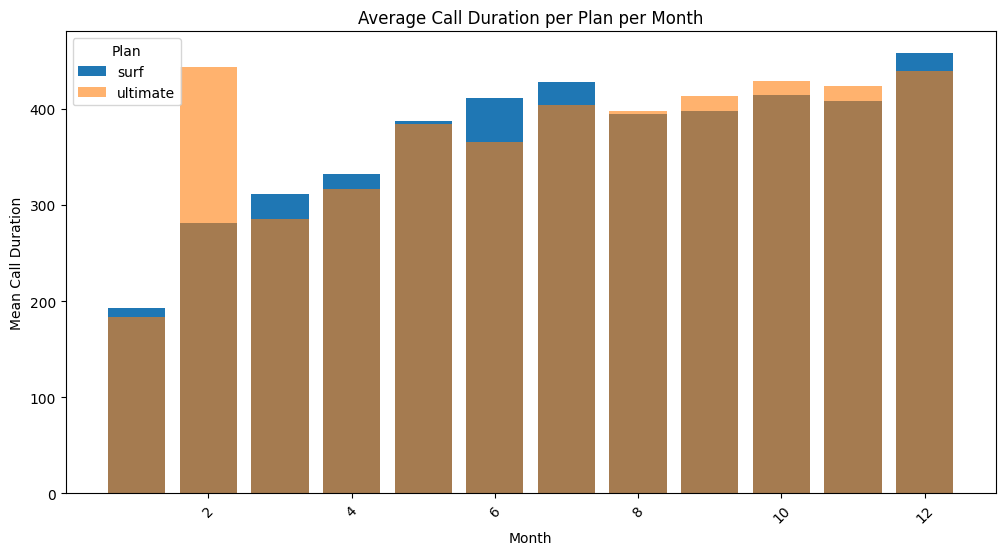

In [ ]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

mean_calls_per_month = merged_data.groupby(['plan' , 'month'])['total_duration'].mean().reset_index(name = 'Mean_duration')

plt.figure(figsize=(12, 6))

# Añadir transparencia a las barras del plan 'surf'
for plan in mean_calls_per_month['plan'].unique():
    subset = mean_calls_per_month[mean_calls_per_month['plan'] == plan]
    if plan == 'ultimate':
        plt.bar(subset['month'], subset['Mean_duration'], label=plan, alpha=0.6)  
    else:
        plt.bar(subset['month'], subset['Mean_duration'], label=plan)

plt.xlabel('Month')
plt.ylabel('Mean Call Duration')
plt.title('Average Call Duration per Plan per Month')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.show()

Conclusiones
`Basandonos en ese grafico podemos ver que el promedio de llamadas para el plan ultimate en el mes de febrero fue el promedio mas alto y para el plan surf en el mes de diciembre fue el promedio mas alto`

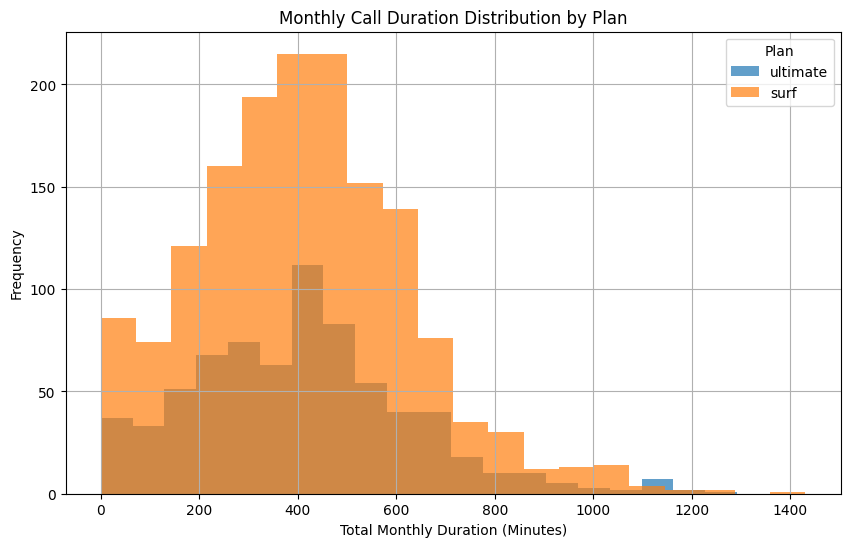

In [ ]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.


plt.figure(figsize=(10, 6))

# Separar los datos por plan y dibujar histogramas para cada plan
for plan in merged_data['plan'].unique():
    subset = merged_data[merged_data['plan'] == plan]
    plt.hist(subset['total_duration'], bins=20, alpha=0.7, label=plan)

plt.xlabel('Total Monthly Duration (Minutes)')
plt.ylabel('Frequency')
plt.title('Monthly Call Duration Distribution by Plan')
plt.legend(title='Plan')
plt.grid(True)
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [ ]:
# Calcula la media y la varianza de la duración mensual de llamadas.

mean_duration_by_plan = merged_data.groupby('plan')['total_duration'].mean()
variance_duration_by_plan = merged_data.groupby('plan')['total_duration'].var()

# Imprimir los resultados
print("Media de duración mensual de llamadas por plan:")
print(mean_duration_by_plan)
print("\nVarianza de duración mensual de llamadas por plan:")
print(variance_duration_by_plan)


Media de duración mensual de llamadas por plan:
plan
surf        412.097890
ultimate    410.180954
Name: total_duration, dtype: float64

Varianza de duración mensual de llamadas por plan:
plan
surf        47001.254231
ultimate    50510.631705
Name: total_duration, dtype: float64


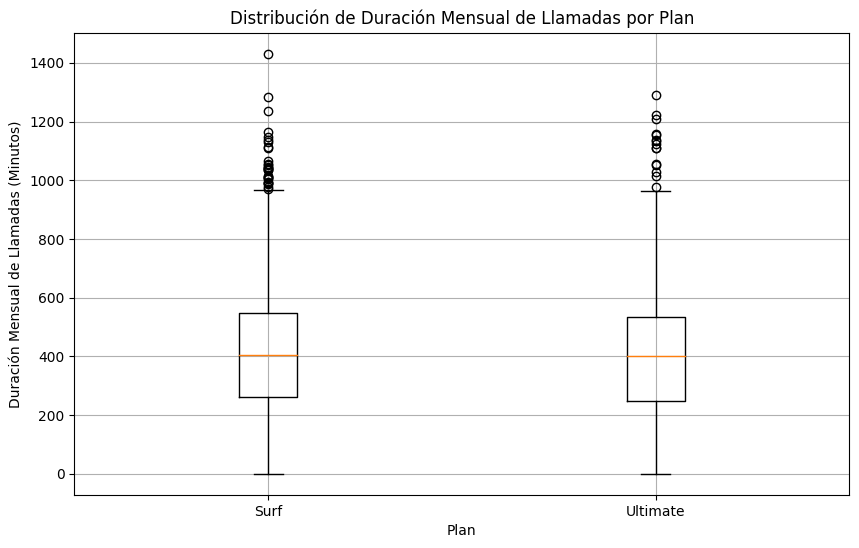

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
plt.boxplot([merged_data[merged_data['plan'] == 'surf']['total_duration'], 
             merged_data[merged_data['plan'] == 'ultimate']['total_duration']], 
            labels=['Surf', 'Ultimate'])

# Añadir etiquetas y título
plt.xlabel('Plan')
plt.ylabel('Duración Mensual de Llamadas (Minutos)')
plt.title('Distribución de Duración Mensual de Llamadas por Plan')

# Mostrar el diagrama de caja
plt.grid(True)
plt.show()

Podemos observar que en el grafico de la caja de bigotes para el plan surf hay una cantidad mayor de valores atipicos esto puede significar en este caso que hay mas usuarios los que realizan llamadas de mucha mas duracion

### Mensajes

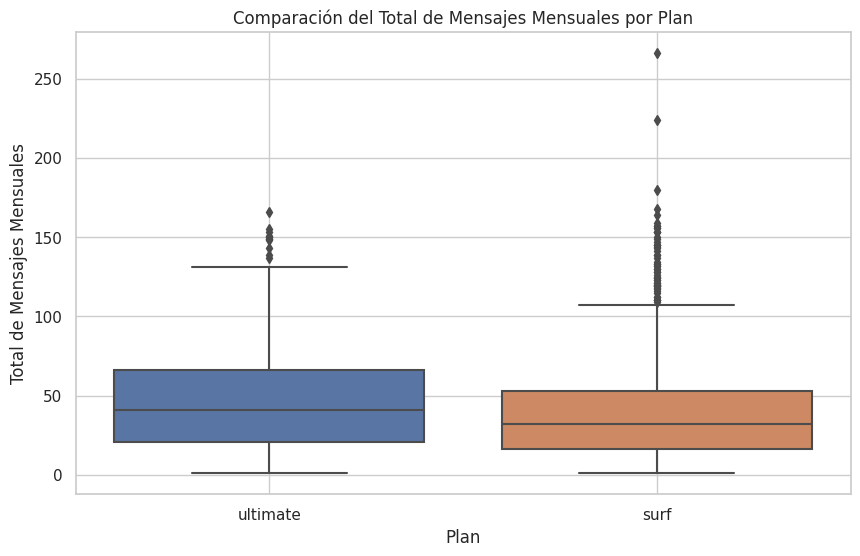

In [ ]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Configuración de estilo
sns.set(style="whitegrid")

# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='Total_messages', data=merged_data)

# Añadir etiquetas y título
plt.xlabel('Plan')
plt.ylabel('Total de Mensajes Mensuales')
plt.title('Comparación del Total de Mensajes Mensuales por Plan')

# Mostrar el diagrama de caja
plt.grid(True)
plt.show()

### Internet

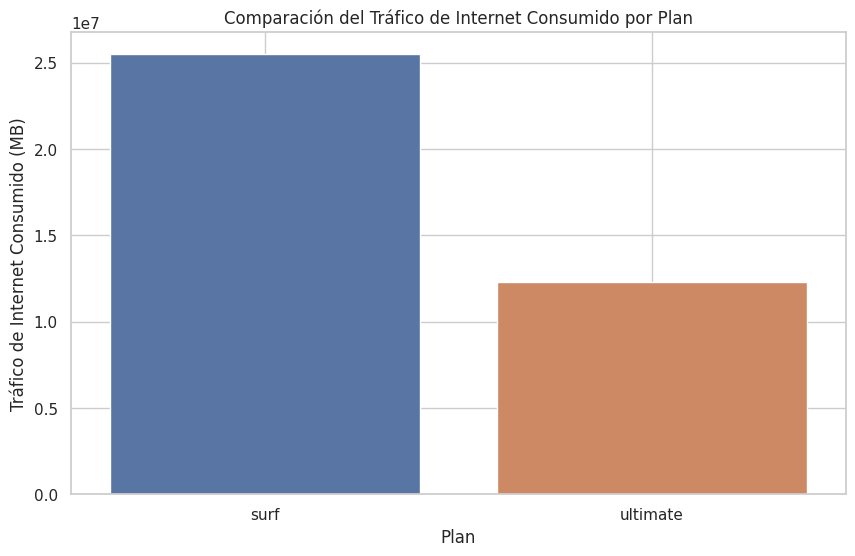

In [ ]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

traffic_by_plan = merged_data.groupby('plan')['Traffic_volume'].sum().reset_index()

# Configurar el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='plan', y='Traffic_volume', data=traffic_by_plan)

# Añadir etiquetas y título
plt.xlabel('Plan')
plt.ylabel('Tráfico de Internet Consumido (MB)')
plt.title('Comparación del Tráfico de Internet Consumido por Plan')

# Mostrar el gráfico de barras
plt.grid(True)
plt.show()

Podemos ver que el comportamiento si varia dependiendo de el plan , en el plan surf encontramos un mayor trafico de internet condumido por plan a diferencia de el plan ultimate que es significativamente mejor el trafico consumido.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis
ultimate_revenue = merged_data[merged_data['plan'] == 'ultimate']['monthly_revenue']
surf_revenue = merged_data[merged_data['plan'] == 'surf']['monthly_revenue']

# Realizar la prueba t de Student
t_statistic, p_value = st.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

# Nivel de significancia (alfa)
alpha = 0.05

# Imprimir los resultados
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

# Comprobar si se rechaza la hipótesis nula
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay evidencia suficiente para concluir que hay una diferencia significativa en los ingresos promedio entre los usuarios de los planes Ultimate y Surf.")
else:
    print("No se rechaza la hipótesis nula: no hay suficiente evidencia para concluir que hay una diferencia significativa en los ingresos promedio entre los usuarios de los planes Ultimate y Surf.")


Estadístico t: 8.808284240212345
Valor p: 2.8950294906188983e-18
Se rechaza la hipótesis nula: hay evidencia suficiente para concluir que hay una diferencia significativa en los ingresos promedio entre los usuarios de los planes Ultimate y Surf.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis

merged_data = pd.merge(merged_data, users[['user_id', 'city']], on='user_id', how='left')

# Obtener los ingresos mensuales de usuarios del área NY-NJ y de otras regiones
ny_nj_revenue = merged_data[merged_data['city'].str.contains('New York-Newark-Jersey City, NY-NJ-PA MSA', case=False)]['monthly_revenue']
other_regions_revenue = merged_data[~merged_data['city'].str.contains('New York-Newark-Jersey City, NY-NJ-PA MSA', case=False)]['monthly_revenue']

# Realizar la prueba t de Student o la prueba de Mann-Whitney U dependiendo de la distribución de los datos
# Comprobamos si los datos siguen una distribución normal
if st.normaltest(ny_nj_revenue).pvalue > 0.05 and st.normaltest(other_regions_revenue).pvalue > 0.05:
    # Los datos siguen una distribución normal, podemos usar la prueba t de Student
    t_statistic, p_value = st.ttest_ind(ny_nj_revenue, other_regions_revenue, equal_var=False)
else:
    # Los datos no siguen una distribución normal, usamos la prueba de Mann-Whitney U
    u_statistic, p_value = st.mannwhitneyu(ny_nj_revenue, other_regions_revenue)

# Nivel de significancia (alfa)
alpha = 0.05

# Imprimir los resultados
print("Valor p:", p_value)

# Comprobar si se rechaza la hipótesis nula
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay evidencia suficiente para concluir que hay una diferencia significativa en el ingreso promedio entre los usuarios del área NY-NJ y los usuarios de otras regiones.")
else:
    print("No se rechaza la hipótesis nula: no hay suficiente evidencia para concluir que hay una diferencia significativa en el ingreso promedio entre los usuarios del área NY-NJ y los usuarios de otras regiones.")


Valor p: 0.0004245108766945332
Se rechaza la hipótesis nula: hay evidencia suficiente para concluir que hay una diferencia significativa en el ingreso promedio entre los usuarios del área NY-NJ y los usuarios de otras regiones.


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola, Rodrigo! Ya solamente es importante verificar que contamos con la variable 'city' en la base que usamos para el desarrollo de las pruebas de hipótesis
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> Disculpa nose por que antes si me corria ya esta solucionado!<a class="tocSkip"></a>


## Conclusión general

Este trabajo me a ayudado mucho para poner a prueba los conocimientos